In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
%matplotlib notebook
import matplotlib.animation as animation
import gif

### Take data from GitHub of Civil Protection Dpt 
Aggregate National Data

In [2]:
df = pd.read_csv("https://raw.github.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")

In [3]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
397,2021-03-27T17:00:00,ITA,28621,3635,32256,539622,571878,5167,23839,2832939,...,48820663,22628158.0,NaN,264.0,NaN,NaN,3405661.0,106792.0,39659217.0,9161446.0
398,2021-03-28T17:00:00,ITA,28701,3679,32380,540855,573235,1357,19611,2850889,...,49093293,22718748.0,NaN,217.0,NaN,NaN,3424211.0,107846.0,39824085.0,9269208.0
399,2021-03-29T17:00:00,ITA,29163,3721,32884,533109,565993,-7242,12916,2870614,...,49249985,22773499.0,NaN,192.0,NaN,NaN,3436711.0,108246.0,39924265.0,9325720.0
400,2021-03-30T17:00:00,ITA,29231,3716,32947,529885,562832,-3161,16017,2889301,...,49551436,22863296.0,NaN,269.0,NaN,NaN,3450673.0,110339.0,40078914.0,9472522.0
401,2021-03-31T17:00:00,ITA,29180,3710,32890,529618,562508,-324,23904,2913045,...,49902657,22964290.0,NaN,283.0,NaN,NaN,3472127.0,112772.0,40284708.0,9617949.0


In [4]:
df.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

In [5]:
#TO CHANGE the data format ---delete the 00:00:00---------------------------------------------


m=0
df['data_nuova'] = df['data'][0][0:10]
m+=1
while m<len(df.data):
    df['data_nuova'][m] = df['data'][m][0:10]
    m+=1

    

#to see how many swabs everyday---------------------------------------------------------------



l=0
df['tamponi_quotidiani'] = df['tamponi'][l]
l=1
while l<len(df.data):
    df['tamponi_quotidiani'][l] = df['tamponi'][l]-df['tamponi'][l-1]
    l +=1

    
    

#to see how many recovered everyday-----------------------------------------------------------



z=0
df['nuovi_guariti'] = df['dimessi_guariti'][z]
z=1
while z<len(df.tamponi):
    df['nuovi_guariti'][z] = df['dimessi_guariti'][z]-df['dimessi_guariti'][z-1]
    z +=1
    

#to see how many death every day--------------------------------------------------------------



n=0
df['nuovi_deceduti'] = df['deceduti'][n]
n=1
while n<len(df.tamponi):
    df['nuovi_deceduti'][n] = df['deceduti'][n]-df['deceduti'][n-1]
    n +=1

<ipython-input-5-98969fd6161a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_nuova'][m] = df['data'][m][0:10]
<ipython-input-5-98969fd6161a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tamponi_quotidiani'][l] = df['tamponi'][l]-df['tamponi'][l-1]
<ipython-input-5-98969fd6161a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nuovi_guariti'][z] = df['dimessi_guariti'][z]-df['dimessi_guariti'][z-1]
<ipython-inp

In [6]:
df.drop(['data','stato','note'], axis = 1, inplace = True)
df.columns

#ordering how I prefer---------------------------------------------------------------------------------------------

df = df[['data_nuova','ricoverati_con_sintomi', 'terapia_intensiva','ingressi_terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi','variazione_totale_positivi','dimessi_guariti',
       'deceduti', 'totale_casi', 'nuovi_positivi', 'tamponi', 'tamponi_quotidiani', 'nuovi_guariti',
         'nuovi_deceduti', 'casi_testati','casi_da_sospetto_diagnostico', 'casi_da_screening']]

In [7]:
#rename columns with esay to call names---------------------------------------------------------------------

df1 = df.rename(columns={"data_nuova": "Date", "ricoverati_con_sintomi": "Hs", "terapia_intensiva": 'Hic', 
                         "ingressi_terapia_intensiva": "dHic",
                         "totale_ospedalizzati": "H", "isolamento_domiciliare": "I", "totale_positivi": "P",
                         "variazione_totale_positivi": "dP", "dimessi_guariti": "R", "deceduti":"D", "totale_casi": "N", 
                         "nuovi_positivi":"dN","tamponi": "S", "tamponi_quotidiani":"dS", "nuovi_guariti":"dR",
                         "nuovi_deceduti": "dD","casi_testati" : "tc"})

In [8]:
#to see how many tested cases every day------------------------------------------------------------------


df1['dtc'] = 'NaN'
k=56
while k<len(df1.Date):
    df1['dtc'][k] = df1['tc'][k]-df1['tc'][k-1]
    k +=1

<ipython-input-8-584ce1661f42>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dtc'][k] = df1['tc'][k]-df1['tc'][k-1]


In [9]:
#set the variable data from x-----------------------------------------------------------------------------


x = df1["Date"]
converted_dates = mlp.dates.datestr2num(x)
data = (converted_dates)

In [10]:
df1['lethality'] = df1['D']/df1['N']
df1.lethality.describe()

count    402.000000
mean       0.088490
std        0.048174
min        0.020071
25%        0.034811
50%        0.100778
75%        0.139195
max        0.145252
Name: lethality, dtype: float64

In [11]:
x = df1['lethality']
t = data

<IPython.core.display.Javascript object>


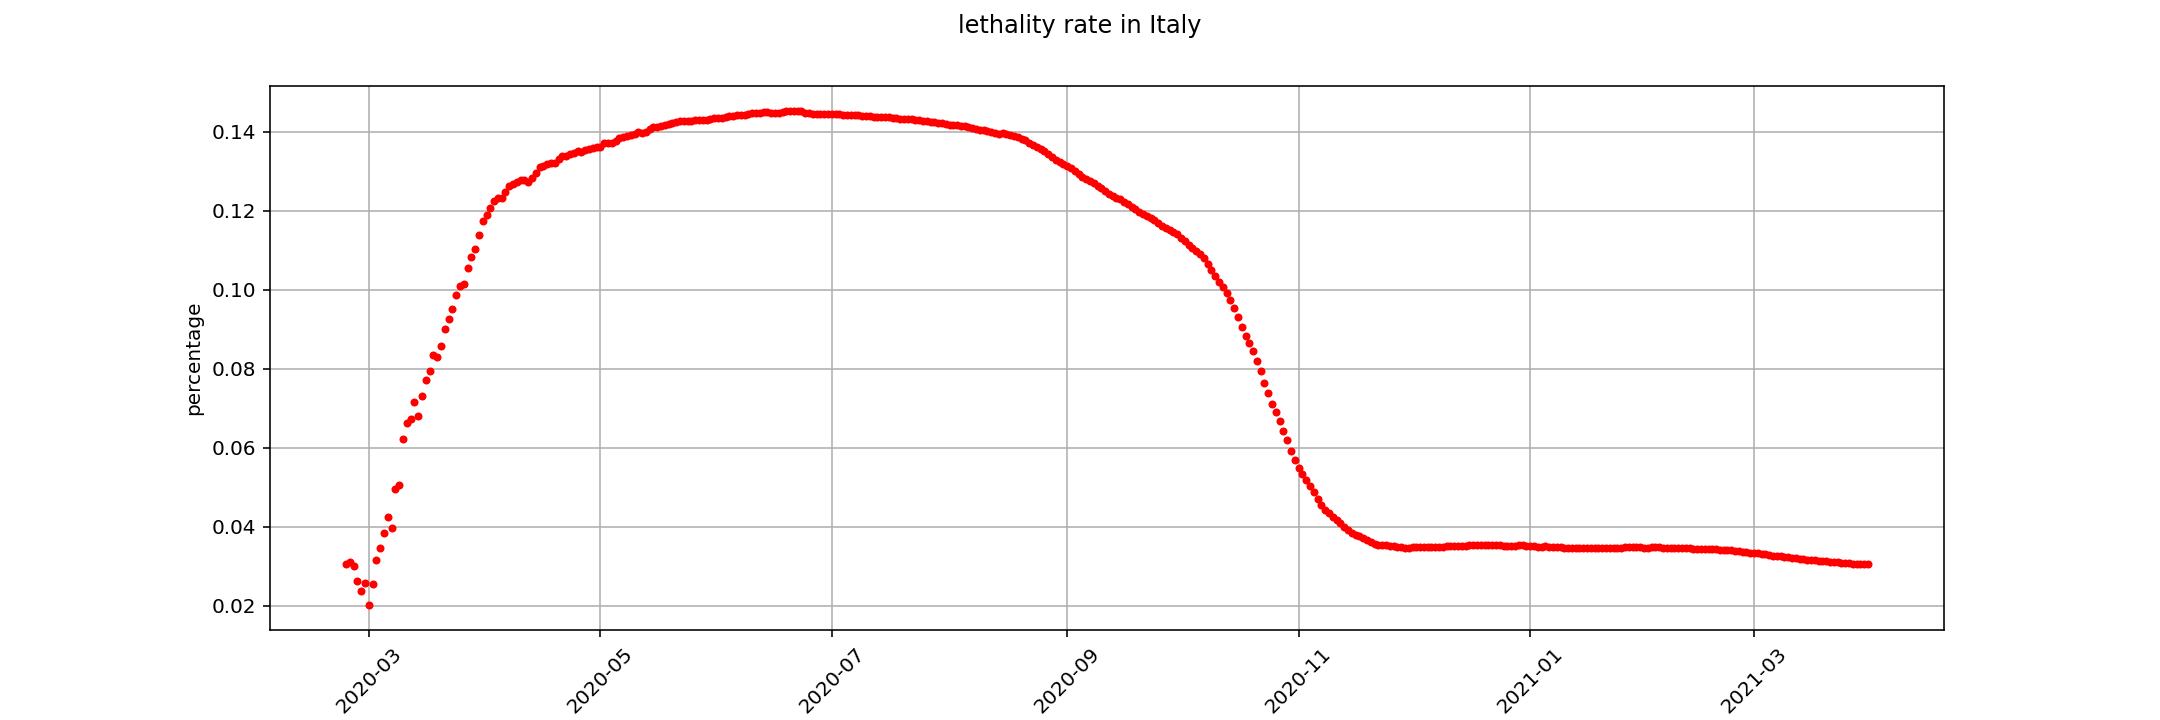

In [12]:
#lethality INTERACTIVE-----------------------------------------------------------------------------------



let = df1.lethality
fig = plt.figure(figsize= (15,5))
plt.plot_date(data, let, '.', color='r')
fig.suptitle('lethality rate in Italy')
plt.xlabel('date')
plt.ylabel('percentage')
plt.xticks(rotation=45)
plt.grid()

<IPython.core.display.Javascript object>


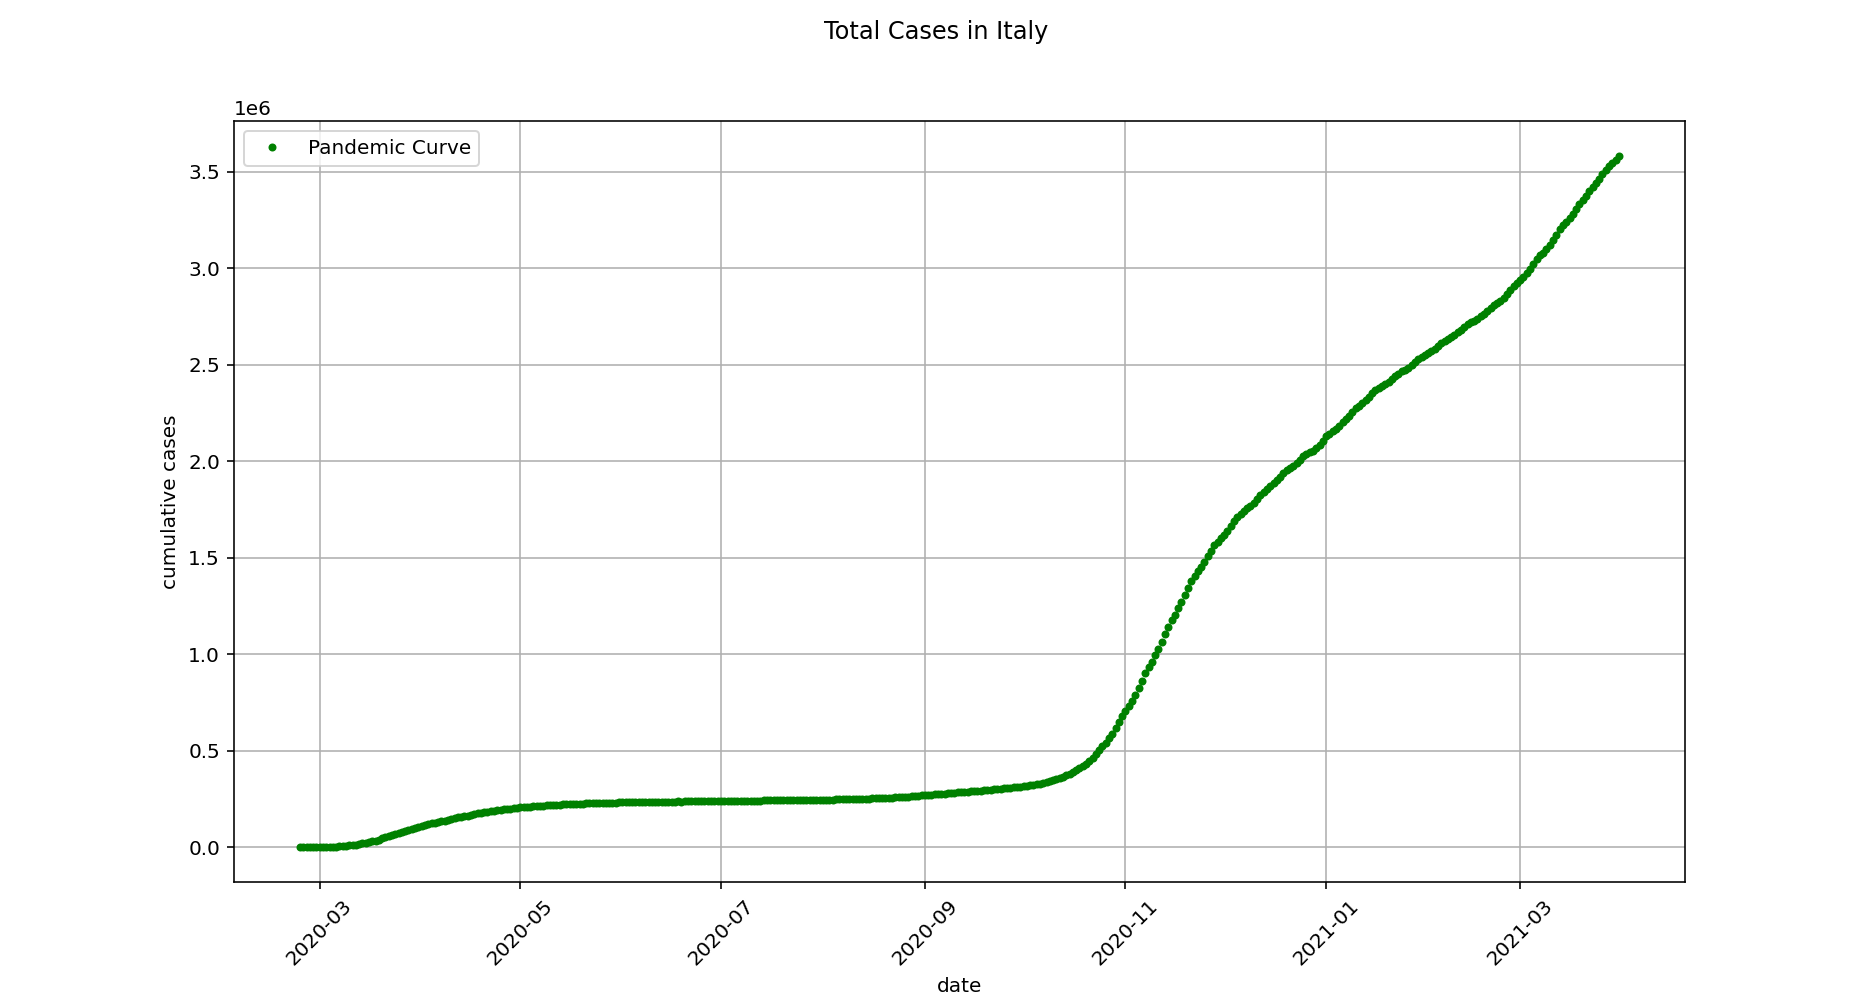

In [13]:
#TOTAL CASES IN ITALY INTERACTIVE-------------------------------------------------------------------------


tc = df1.N

fig = plt.figure(figsize=(13,7))
plt.plot_date(data, tc, '.', color='g', linewidth=3, label='Pandemic Curve')
fig.suptitle('Total Cases in Italy')
plt.xlabel('date')
plt.ylabel('cumulative cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

In [14]:
df1.Date[len(df1.Date)-1] #Ultimo dato----------------------------------------------------------------

'2021-03-31'

## To run the following cell pay attention to input the last data you have, and it is suggested in the previous cell. It Print out a gif in your directory; it requires some seconds and is about 20Mb.

In [ ]:
START = pd.Timestamp("2020-02-24")
END = pd.Timestamp("INPUTDATA")

casi = tc
df = pd.DataFrame(
    {
        "date": pd.date_range(start=START, end=END),
        "cases": tc,
    }
)


@gif.frame
def plot(date):
    d = df[df["date"] <= date]
    fig, ax = plt.subplots(figsize=(15, 10), dpi=80)
    plt.plot(d["date"], d["cases"])
    ax.set_xlim([START, END])
    ax.set_xticks([date])
    ax.set_yticks([0, 100000])
    ax.set_xticklabels([date.strftime("%b '%y")])
    plt.grid()
    #ax.set_yticklabels([0, 1000, 10000, 100000, 1000000, "cases"])


frames = []
for date in df["date"]:
    frame = plot(date)
    frames.append(frame)

gif.save(frames, "casi_totali.gif", duration=35)

<IPython.core.display.Javascript object>


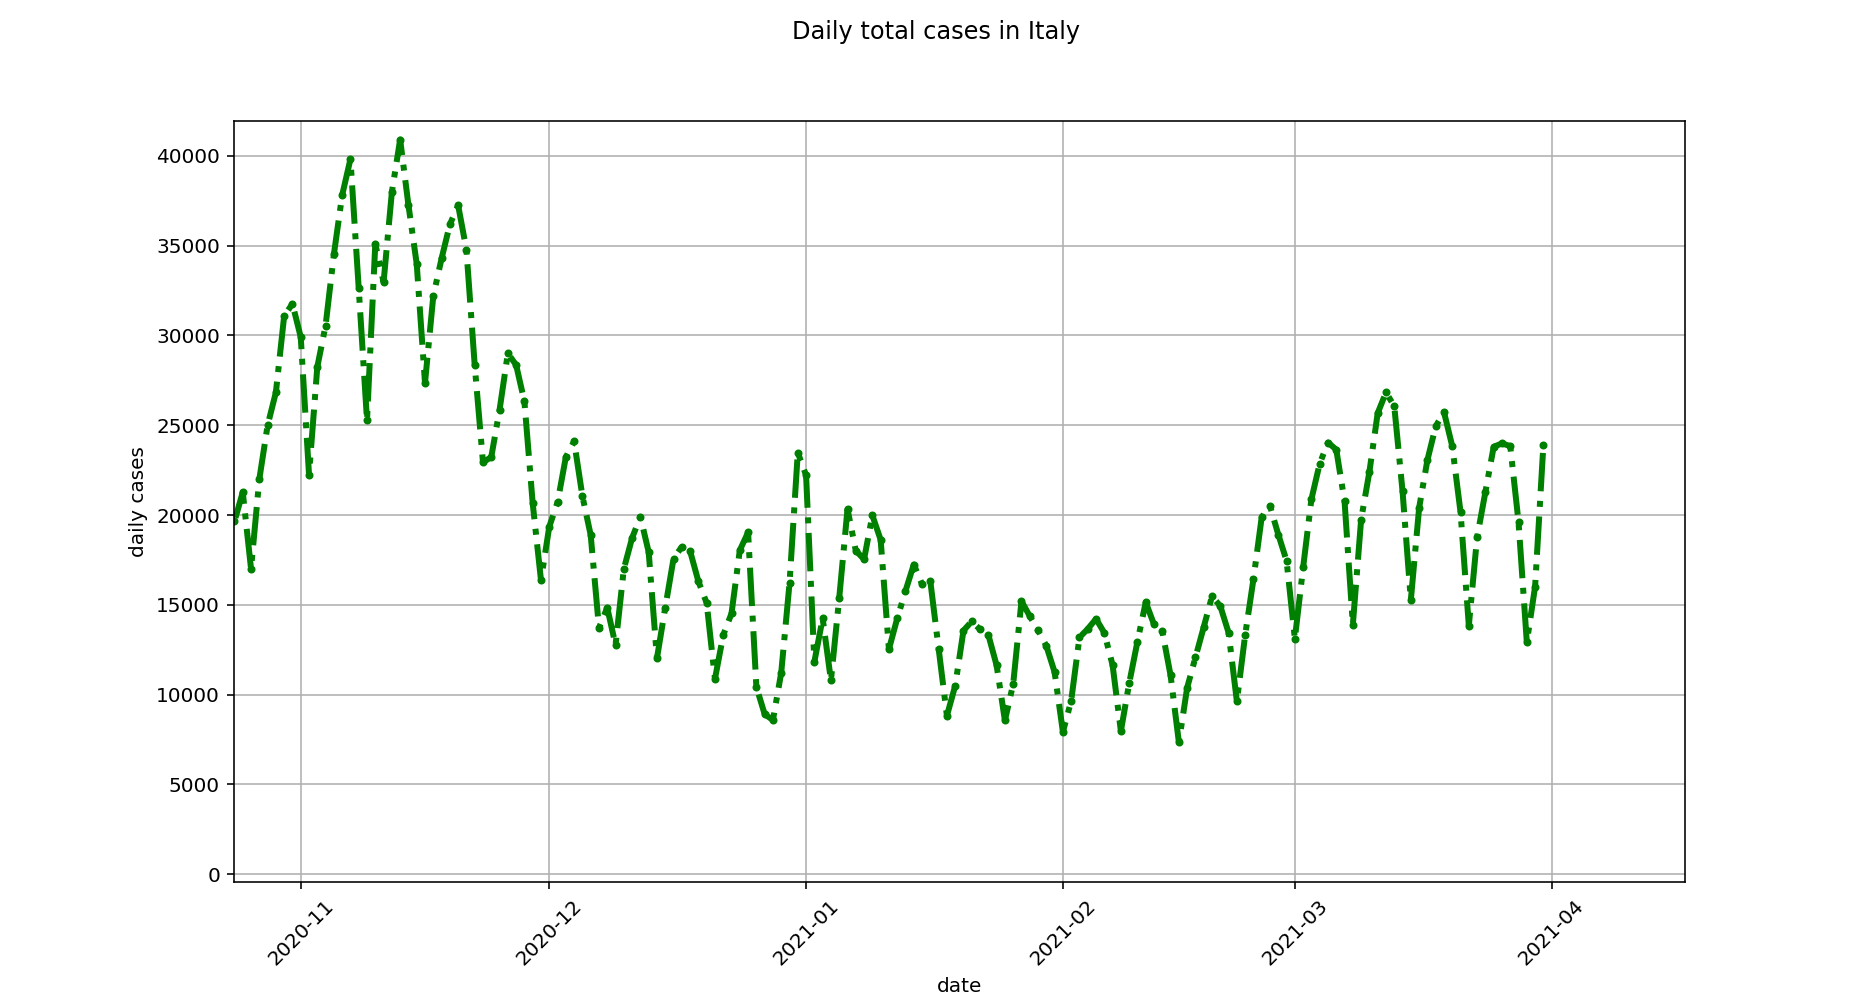

In [15]:
#daily total CASES IN ITALY
dtc = df1.dN
fig = plt.figure(figsize= (13,7))
plt.plot_date(data, dtc, '.-.', color='g', linewidth=3)
fig.suptitle('Daily total cases in Italy')
plt.xlabel('date')
plt.ylabel('daily cases')
plt.xticks(rotation=45)
plt.grid()

## The gif for the daily cases, pay attention as for the previous 

In [ ]:
START = pd.Timestamp("2020-02-24")
END = pd.Timestamp("INPUTDATA")

casiquot = dtc
df = pd.DataFrame(
    {
        "date": pd.date_range(start=START, end=END),
        "cases": dtc,
    }
)


@gif.frame
def plot(date):
    d = df[df["date"] <= date]
    fig, ax = plt.subplots(figsize=(15, 10), dpi=80)
    plt.plot(d["date"], d["cases"])
    ax.set_xlim([START, END])
    ax.set_xticks([date])
    ax.set_yticks([0, 10000])
    ax.set_xticklabels([date.strftime("%b '%y")])
    #ax.set_yticklabels()
    plt.grid()


frames = []
for date in df["date"]:
    frame = plot(date)
    frames.append(frame)

gif.save(frames, "casi_giornalieri.gif", duration=35)

<IPython.core.display.Javascript object>


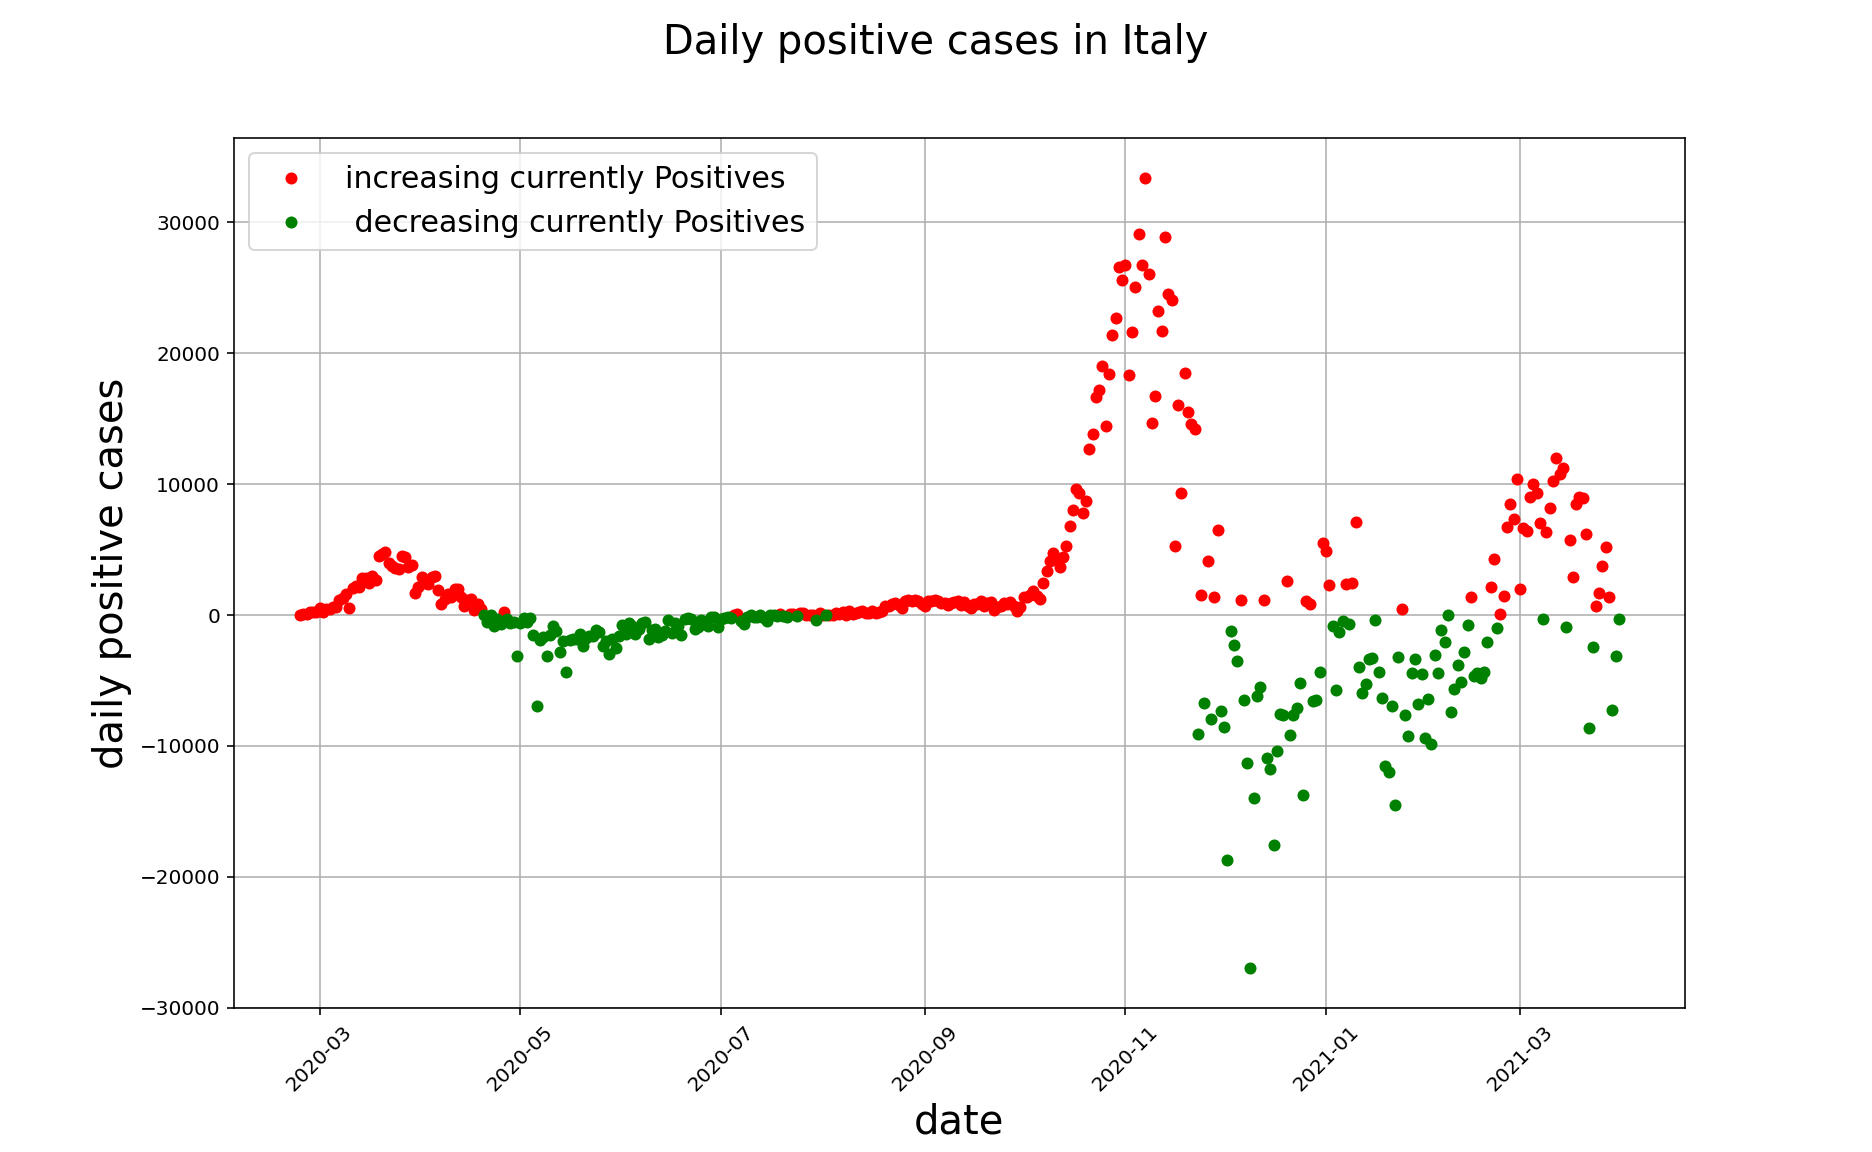

In [16]:
#daily positive people IN ITALY --------------------------------------------------------------
tp1 = df1[df1['dP']>=0].dP
tp2 = df1[df1['dP']<0].dP

#date
d1= df1[df1['dP']>=0].Date
converted_dates = mlp.dates.datestr2num(d1)
data1 = (converted_dates)

d2 = df1[df1['dP']<0].Date
converted_dates = mlp.dates.datestr2num(d2)
data2 = (converted_dates)


#---------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(13,8))
plt.plot_date(data1, tp1, '.', color='r',label = 'increasing currently Positives', markersize = 10)
plt.plot_date(data2, tp2, '.', color='g', label = ' decreasing currently Positives', markersize = 10)
fig.suptitle('Daily positive cases in Italy', fontsize = 20)
plt.xlabel('date', fontsize = 20)
plt.ylabel('daily positive cases', fontsize = 20)
plt.xticks(rotation=45)
plt.grid()
plt.legend(prop={'size': 15})

mlp.rc('xtick', labelsize=10) 
mlp.rc('ytick', labelsize=10)

<IPython.core.display.Javascript object>


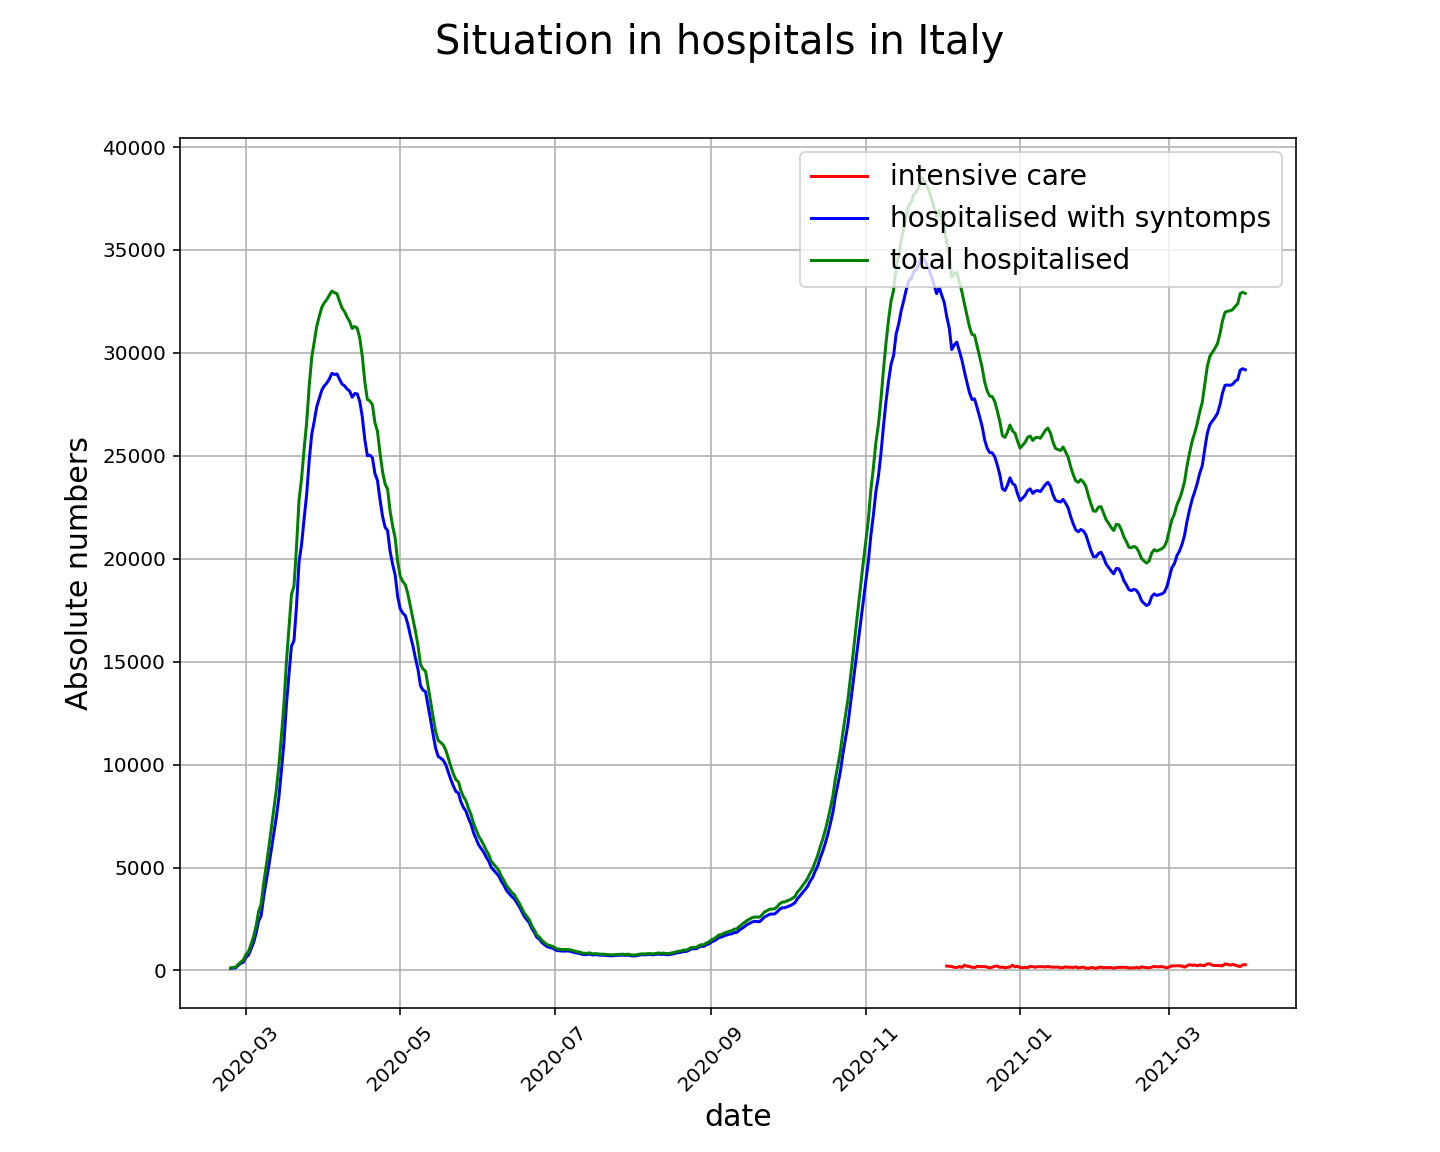

<IPython.core.display.Javascript object>


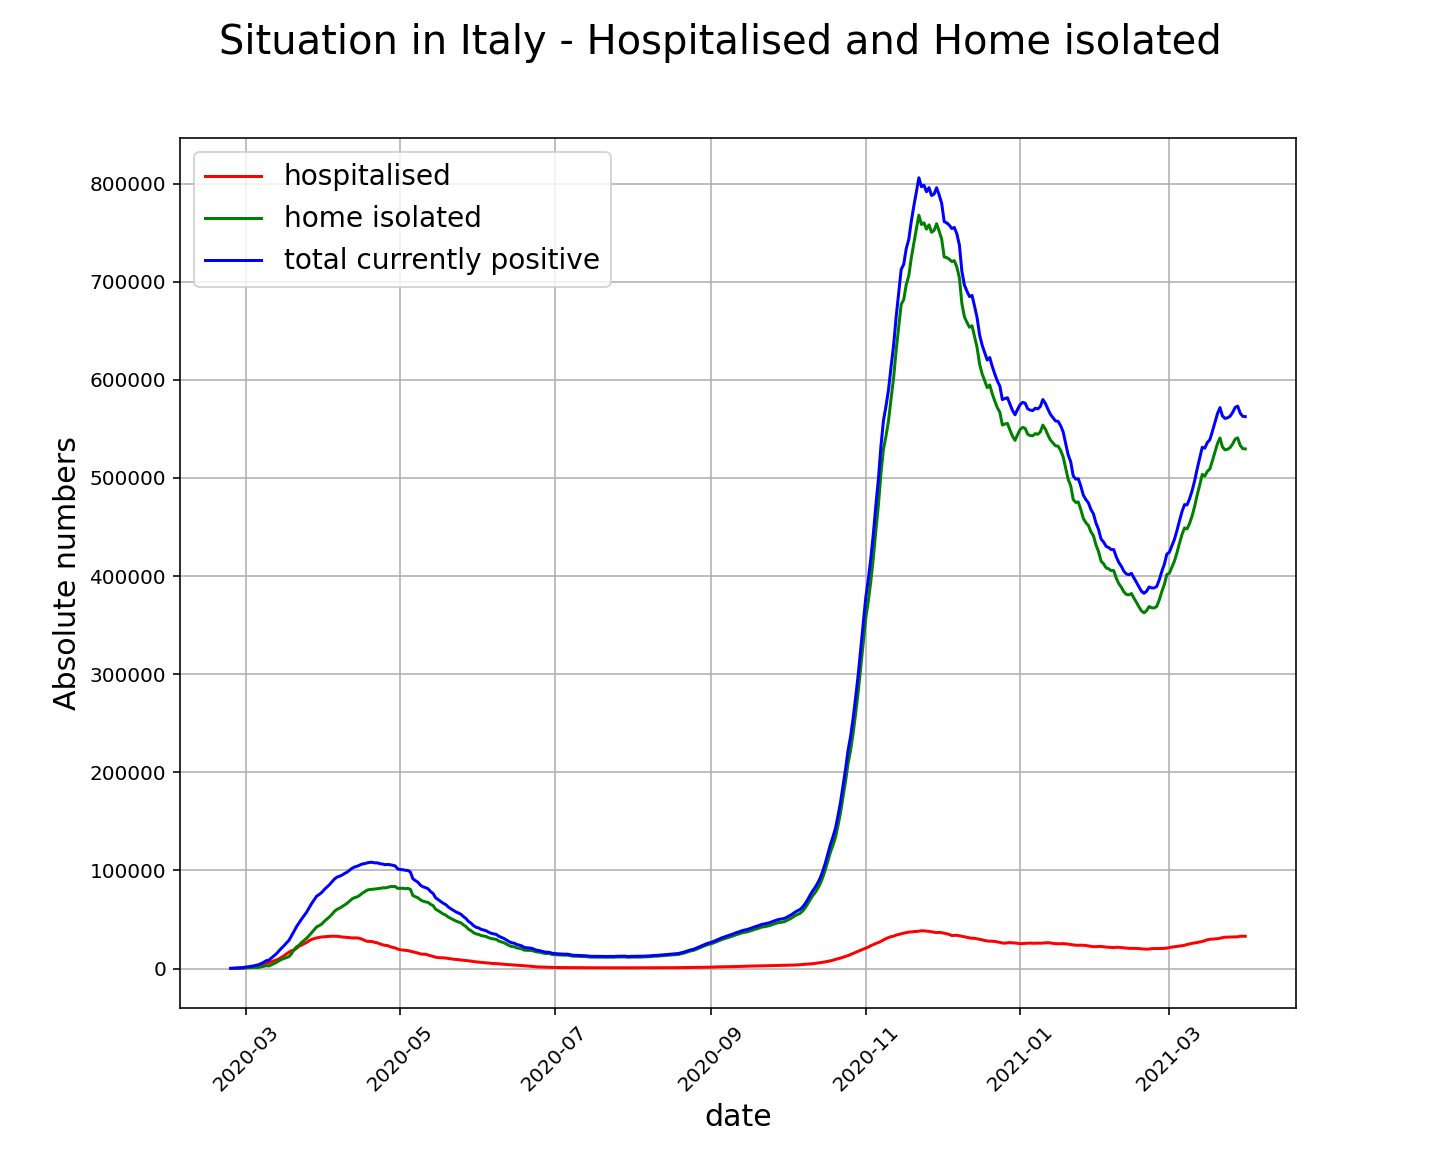

<IPython.core.display.Javascript object>


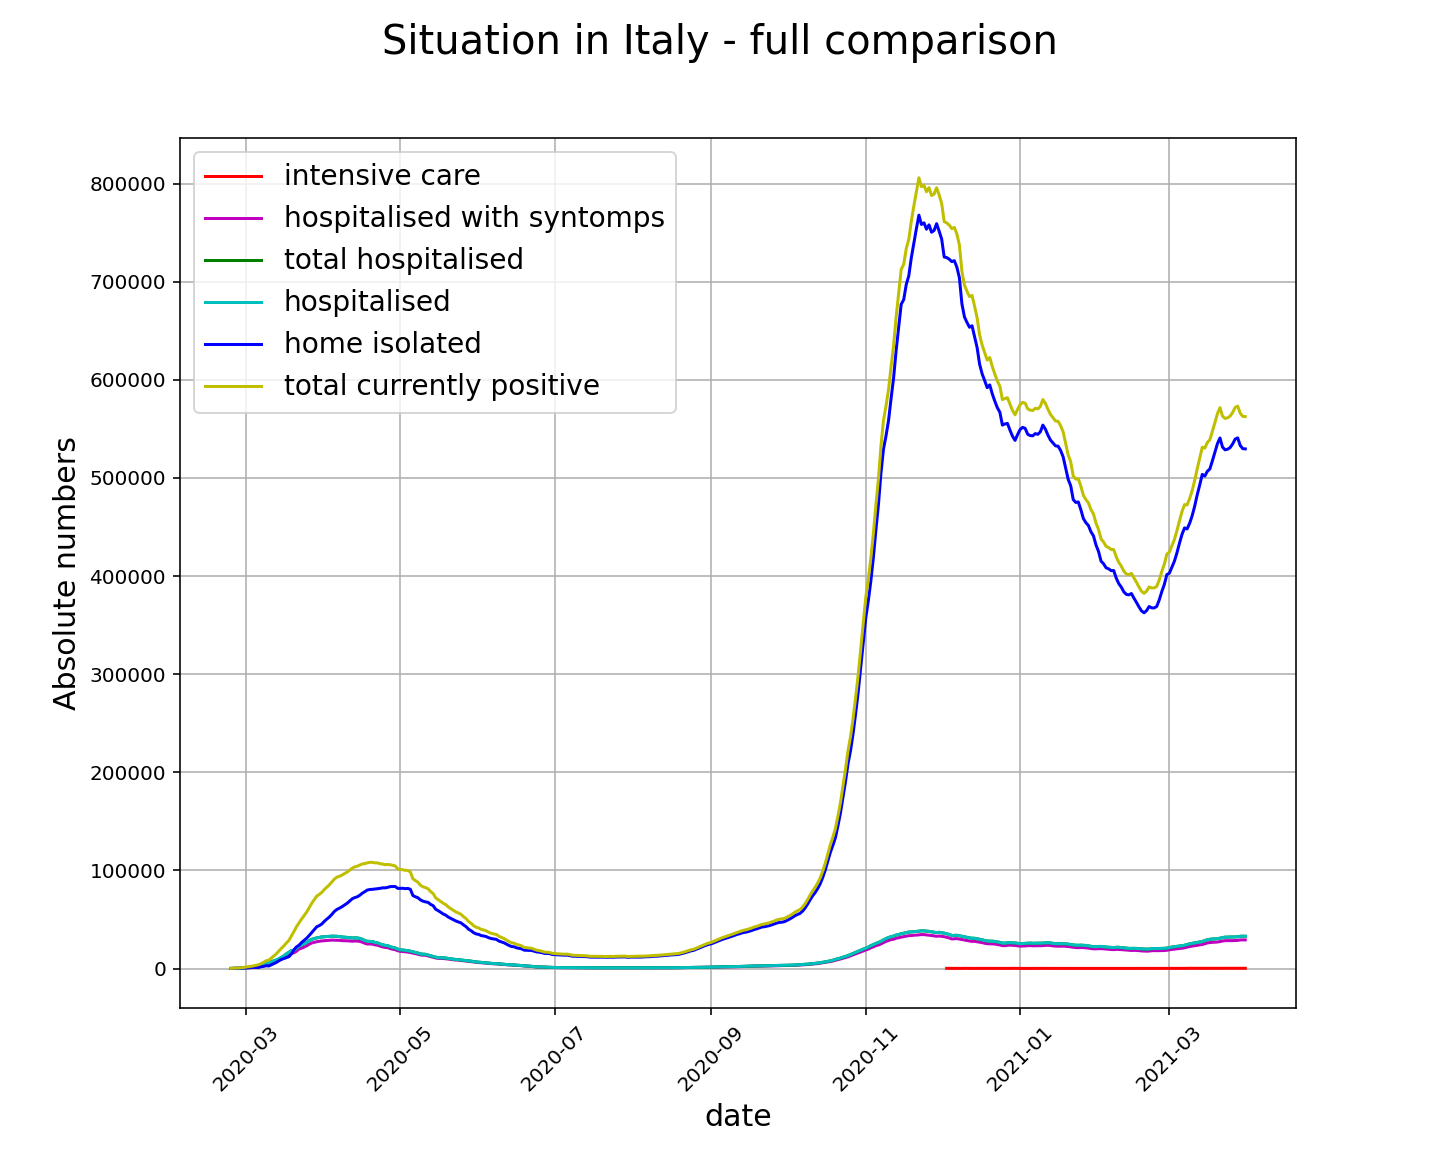

In [17]:
#ANDAMENTO TERAPIA INTENSIVA - Ricoverati con sintomi ed ospedalizzati totali
t = df1.dHic
r = df1.Hs
o = df1.H



fig = plt.figure(figsize=(10,8))
plt.plot_date(data, t, '-', color='r', label = 'intensive care')
plt.plot_date(data, r, '-', color='b', label = 'hospitalised with syntomps')
plt.plot_date(data, o, '-', color='g',  label = 'total hospitalised')
fig.suptitle('Situation in hospitals in Italy', fontsize= 20)
plt.xlabel('date', fontsize=15)
plt.ylabel('Absolute numbers', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc= 1, fontsize= 14)
plt.grid()
#------------------------------------------------------------------------------------
i = df1.I
h = df1.H
a = df1.P
#------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10,8))
plt.plot_date(data, h, '-', color='r', label = 'hospitalised')
plt.plot_date(data, i, '-', color='g', label = 'home isolated')
plt.plot_date(data, a, '-', color='b',  label = 'total currently positive')
fig.suptitle('Situation in Italy - Hospitalised and Home isolated', fontsize = 20)
plt.xlabel('date', fontsize = 15)
plt.ylabel('Absolute numbers', fontsize = 15)
plt.xticks(rotation=45)
plt.legend(loc= 2, fontsize = 14)
plt.grid()
#------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10,8))
plt.plot_date(data, t, '-', color='r', label = 'intensive care')
plt.plot_date(data, r, '-', color='m', label = 'hospitalised with syntomps')
plt.plot_date(data, o, '-', color='g',  label = 'total hospitalised')
plt.plot_date(data, h, '-', color='c', label = 'hospitalised')
plt.plot_date(data, i, '-', color='b', label = 'home isolated')
plt.plot_date(data, a, '-', color='y',  label = 'total currently positive')
fig.suptitle('Situation in Italy - full comparison', fontsize = 20)
plt.xlabel('date', fontsize = 15)
plt.ylabel('Absolute numbers', fontsize = 15)
plt.xticks(rotation=45)
plt.legend(loc= 2, fontsize = 14)
plt.grid()

<IPython.core.display.Javascript object>


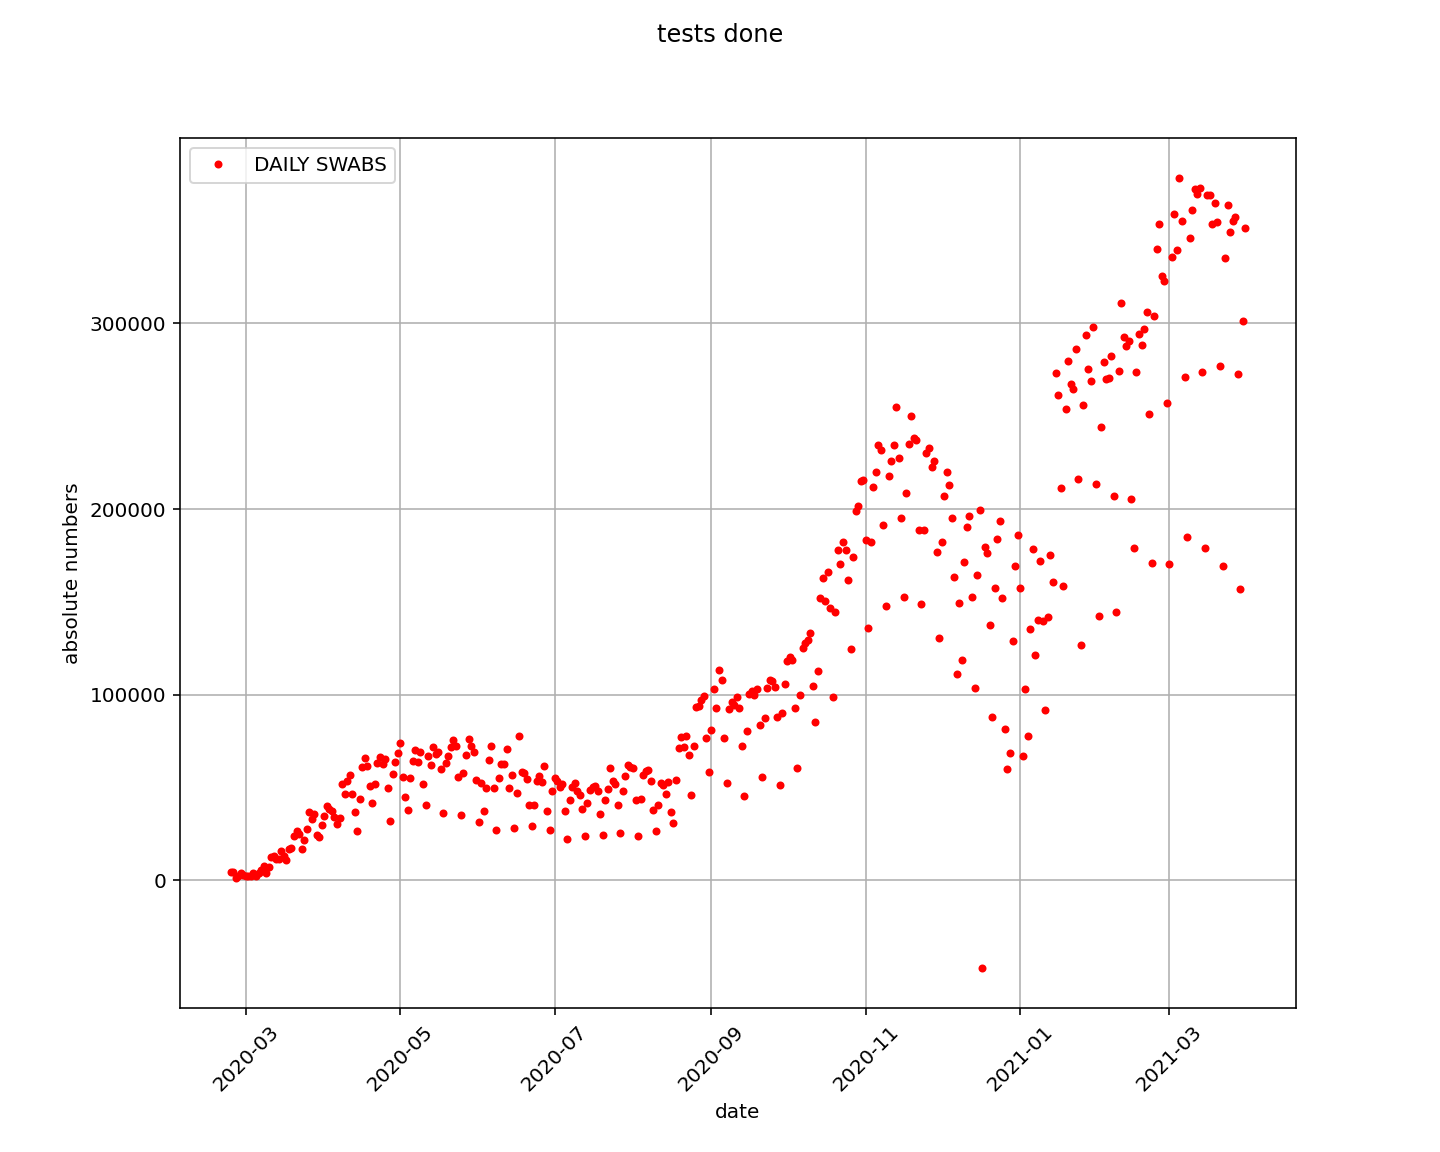

In [18]:
y = df1['dS']

fig = plt.figure(figsize = (10,8))
plt.plot_date(data, y, '.', color='r', label = 'DAILY SWABS', markersize=6)

fig.suptitle('tests done')
plt.xlabel('date')
plt.ylabel('absolute numbers')
plt.xticks(rotation=45)
plt.legend(loc= 2)
plt.grid()

<IPython.core.display.Javascript object>


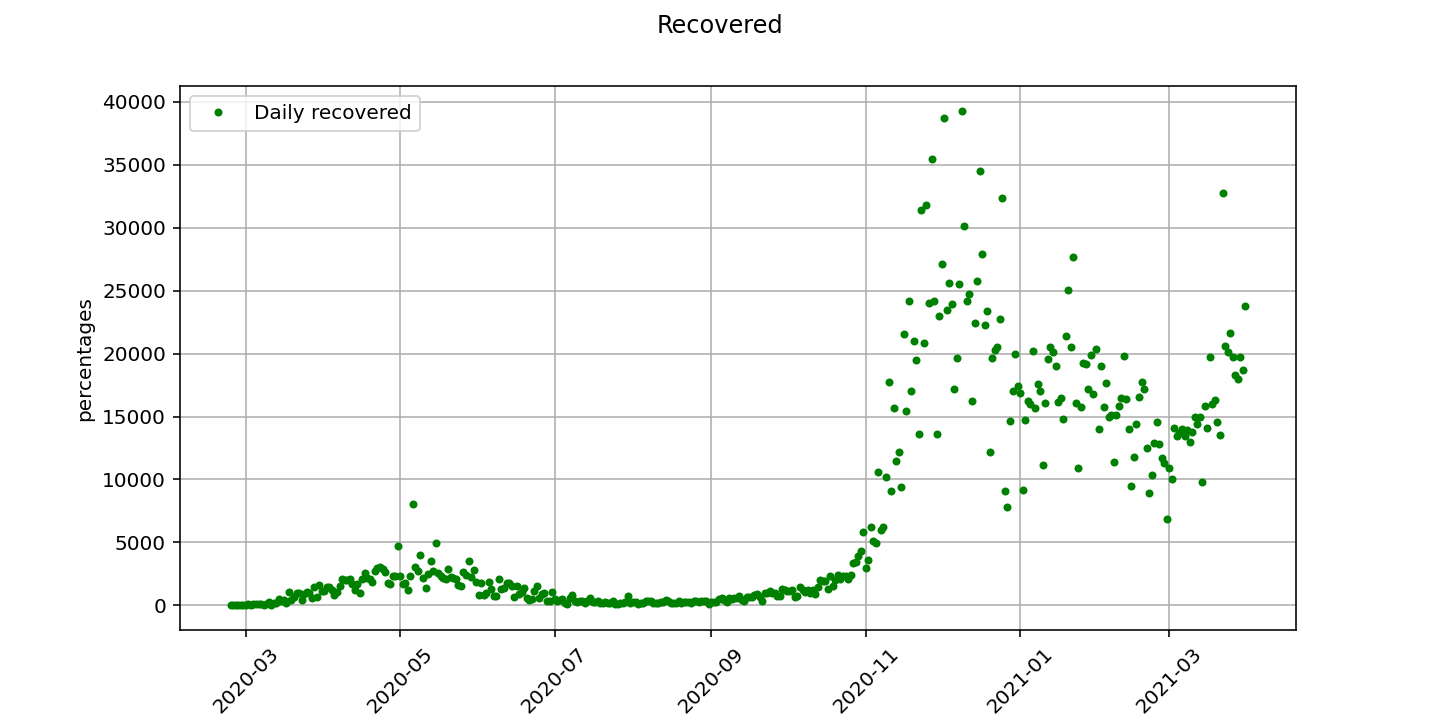

<IPython.core.display.Javascript object>


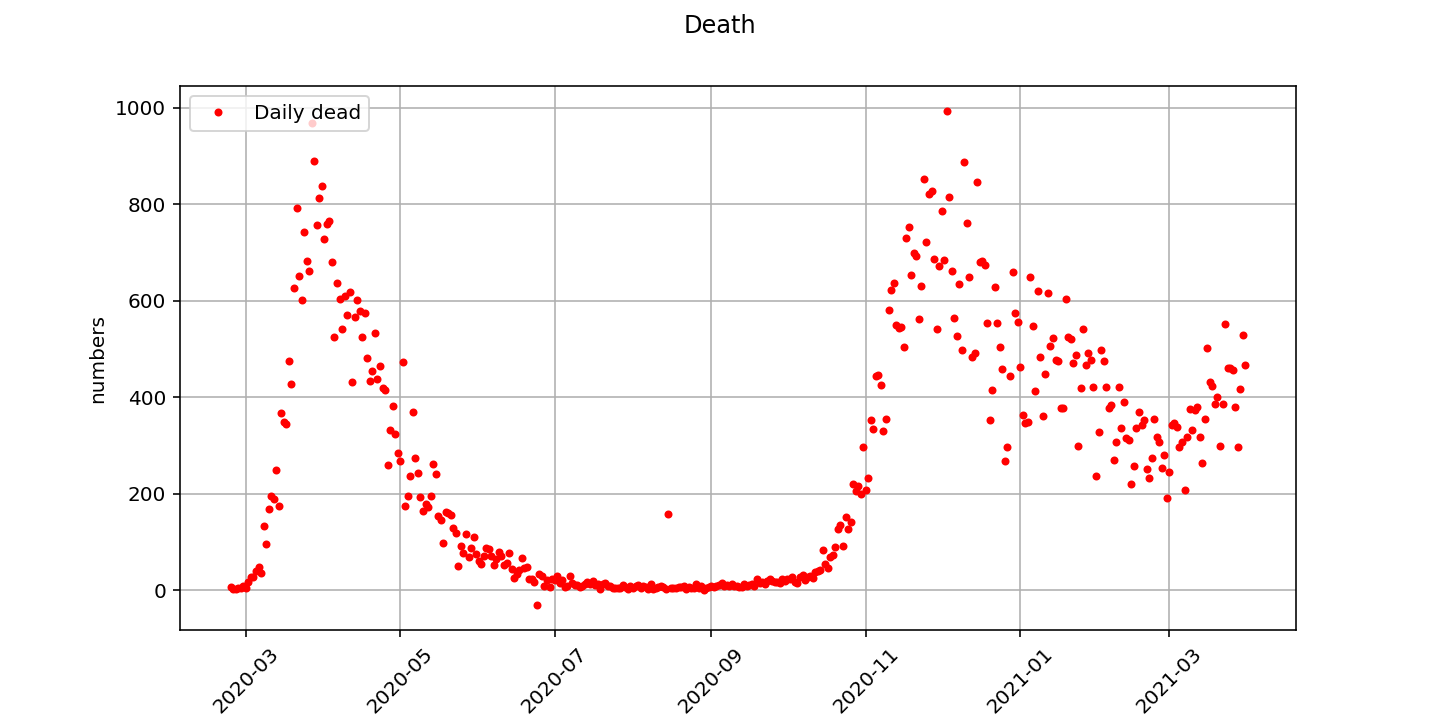

In [19]:
x = df1['dR']
y = df1['dD']

fig = plt.figure(figsize = (10,5))
plt.plot_date(data, x, '.', color='g', label = 'Daily recovered')


#------------------------------------------------------------------------------------
fig.suptitle('Recovered')
plt.xlabel('date')
plt.ylabel('percentages')
plt.xticks(rotation=45)
plt.legend(loc= 2)
plt.grid()
#------------------------------------------------------------------------------------
fig = plt.figure(figsize = (10,5))

plt.plot_date(data, y, '.', color='r', label = 'Daily dead')

fig.suptitle('Death')
plt.xlabel('date')
plt.ylabel('numbers')
plt.xticks(rotation=45)
plt.legend(loc= 2)
plt.grid()

In [20]:
df1['%Intensive_care_H'] = df1['Hic']/df1['H']*100
df1['%OnlyHospital_H'] = 100- abs(df1['%Intensive_care_H'])

<IPython.core.display.Javascript object>


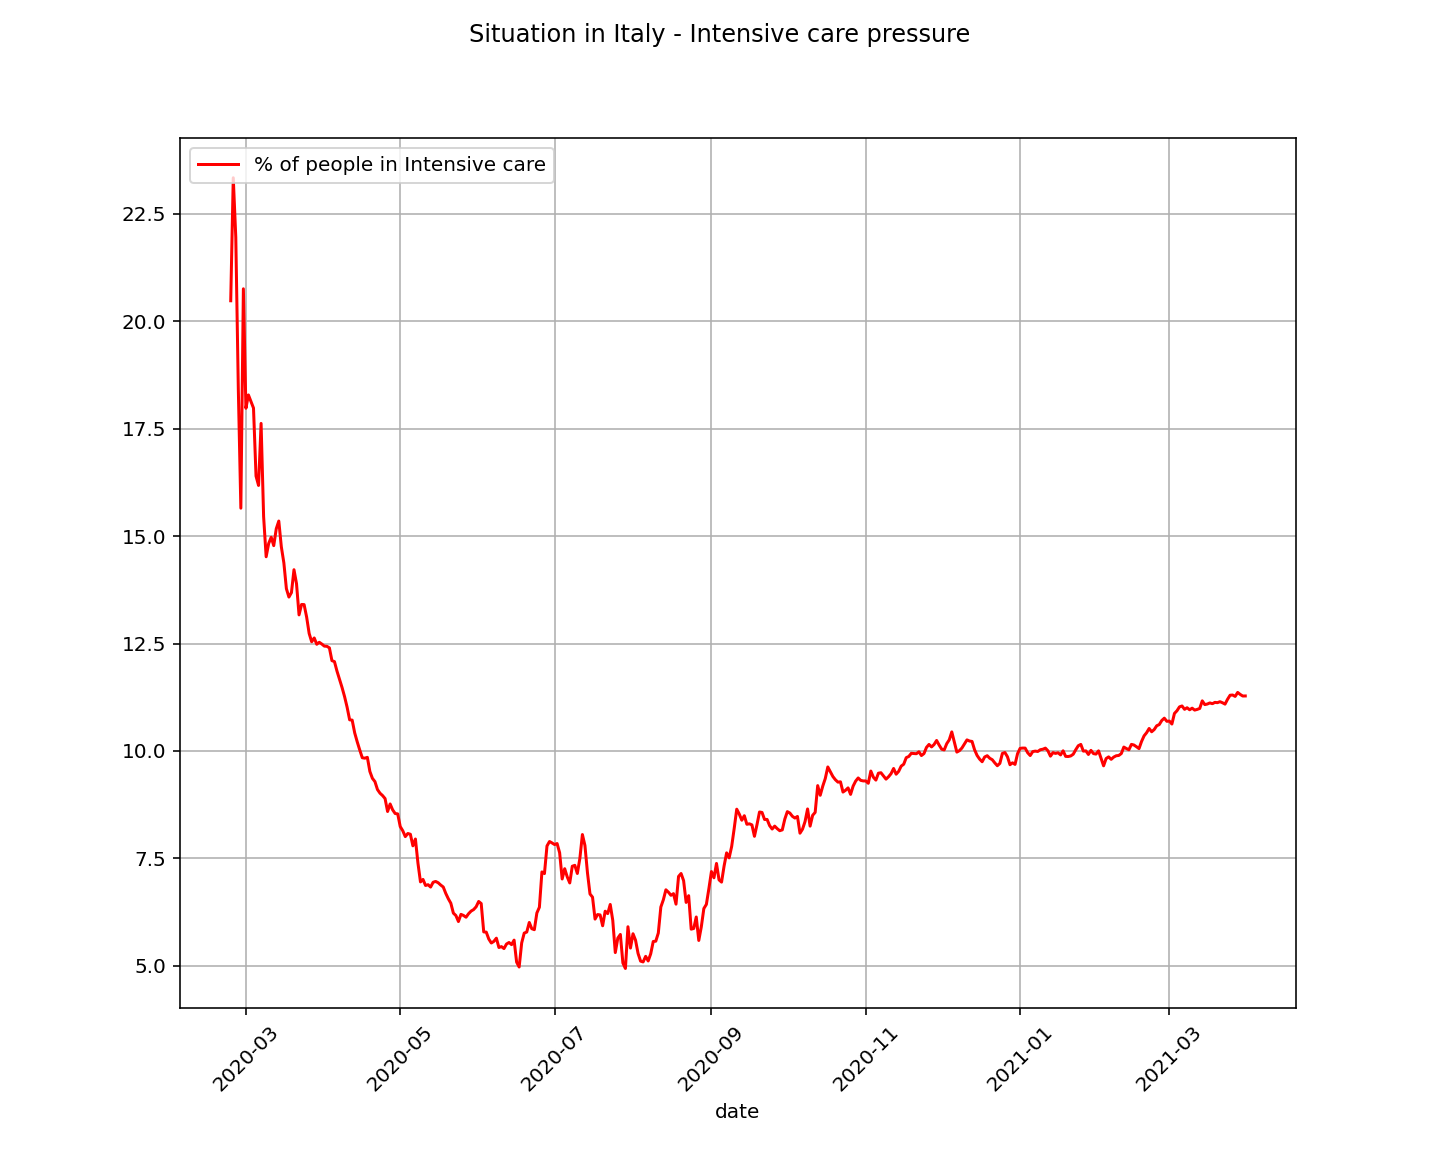

In [21]:
x = df1['%Intensive_care_H']

fig = plt.figure(figsize = (10,8))
plt.plot_date(data, x, '-', color='r', label = '% of people in Intensive care')

fig.suptitle('Situation in Italy - Intensive care pressure')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend(loc= 2)
plt.grid()